# Basic HRTEM simulation

In [1]:
from abtem.waves import PlaneWave
from abtem.potentials import Potential
from abtem.transfer import CTF
from abtem.plot import show_atoms
from ase.io import read

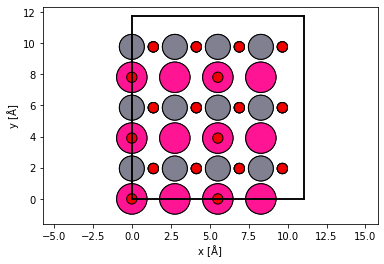

In [2]:
atoms = read('data/srtio3_110.cif')

show_atoms(atoms)

In [3]:
wave = PlaneWave(
    energy=300e3 # acceleration voltage in eV
)

potential = Potential(atoms, sampling=.03)

exit_wave = wave.multislice(potential)

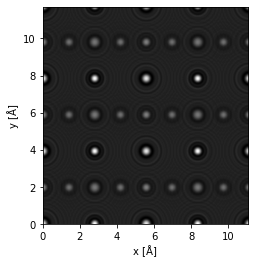

In [4]:
exit_wave.show()

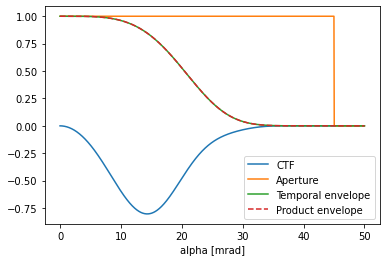

In [5]:
# See https://abtem.readthedocs.io/en/latest/walkthrough/05_contrast_transfer_function.html for parameter names

ctf = CTF(
    energy = wave.energy,
    semiangle_cutoff = 45, # mrad
    focal_spread = 25, # Å
    defocus = -45.46, # Å
    Cs = -7e-6 * 1e10, # Å
)

ctf.show(50)

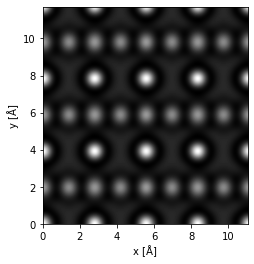

In [6]:
image_wave = exit_wave.apply_ctf(ctf)

image_wave.show()

In [7]:
# get image intensity as array

image_wave.intensity().array

array([[[2.1238966, 2.116283 , 2.0937014, ..., 2.0569065, 2.0937011,
         2.116283 ],
        [2.1162314, 2.1086614, 2.0862072, ..., 2.04962  , 2.0862074,
         2.1086617],
        [2.093495 , 2.0860515, 2.063976 , ..., 2.0280037, 2.0639765,
         2.086052 ],
        ...,
        [2.0564442, 2.0492094, 2.0277479, ..., 1.9927744, 2.0277476,
         2.0492094],
        [2.0934944, 2.0860517, 2.063976 , ..., 2.0280037, 2.063976 ,
         2.086052 ],
        [2.1162312, 2.1086612, 2.0862072, ..., 2.0496202, 2.0862072,
         2.1086612]]], dtype=float32)